## Exploratory Data Analysis - Automobile (Part 2: Data Analysis)

<h3>1. Introduction:</h3>
<p>This notebook contains detailed steps followed for cleansing, preparing and analysing the automobile data set, inorder to determine the relationshop between various attributes of cars and finding the insight out of it. <br /> For more details about the dataset and attribute information, refer <b>Automobile_EDA_Data_Cleaning.ipynb</b> notebook.</p>


#### Importing packages    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline


In [2]:
# Read data from CSV file
df=pd.read_csv("data/Automobile_data_cleaned.csv")

### 2. Data validation

In [3]:
df.shape

(183, 32)

In [378]:
# df.describe()

In [4]:
# !pip install tabulate

In [353]:
# from tabulate import tabulate
# print(tabulate(df[["make","body-style","engine_size_cc","symboling","price"]].head(10), headers='keys', tablefmt='psql'))

<b> Created "avg-mpg" new column which represent the mean value of highway and city mileage.  </b>

In [6]:
df['avg-mpg'] = (df['highway-mpg'] + df['city-mpg']) / 2
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power_to_weight_ratio,risky_or_safe,is_risky,avg-mpg
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,24,30,13950.0,4,4,1786,0.043646,risky,1,27.0
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,18,22,17450.0,4,5,2228,0.040722,risky,1,20.0


### 3. Data analysis

### 3.1 Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

<b>Color codes: </b>

<img width="800" height="600" style="float: left;" src="Images/Color_codes.png">

<b> Set some global values for graph preparion, which will give unique look throughout the project. </b>

In [176]:
title_color = "navy"
plot_color = "crimson"
plot_alt_color = "coral"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0

#### 3.1.1 Vehicle make frequency diagram

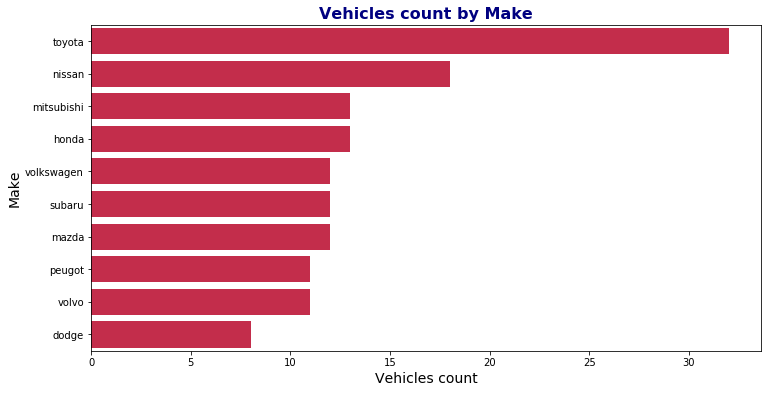

In [9]:
fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Vehicles count by Make", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = df["make"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["make"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Make',fontsize=14 )
symbol_dist.set_xlabel('Vehicles count',fontsize=14)
xticks(rotation=0)

fig.savefig('Images/make_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.2 Insurance risk ratings Histogram

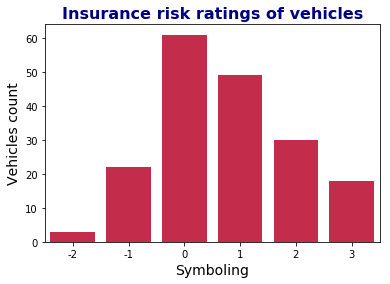

In [313]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Insurance risk ratings of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["symboling"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Symboling',fontsize=14)

fig.savefig('Images/symboling_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.3 Normalized losses histogram

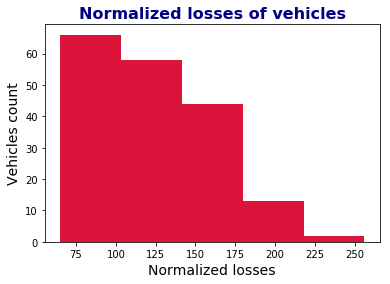

In [11]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Normalized losses of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['normalized-losses'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Normalized losses',fontsize=14)

fig.savefig('Images/normalized-losses_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.4 Horse power histogram

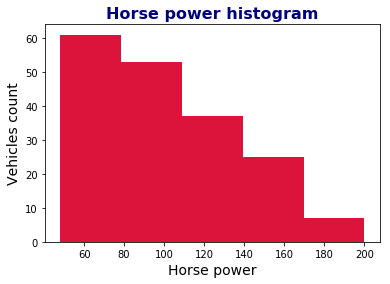

In [12]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Horse power histogram", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['horsepower'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Horse power',fontsize=14)

fig.savefig('Images/horsepower_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.5 Fuel type distribution

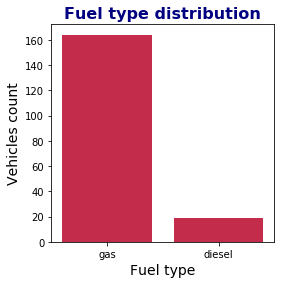

In [13]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["fuel-type"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Fuel type',fontsize=14)

fig.savefig('Images/fuel_type_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.6 Fuel type (aspiration) distribution

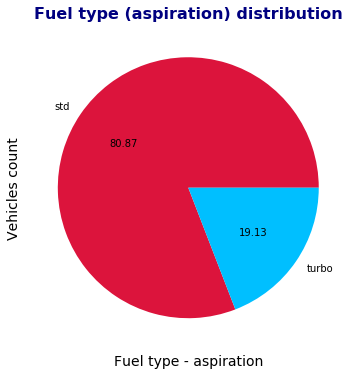

In [14]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type (aspiration) distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f', colors=[plot_color, plot_color_secondary])
#symbol_dist = sns.countplot(df["aspiration"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Fuel type - aspiration',fontsize=14)

fig.savefig('Images/fuel_type_aspiration_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.7 Curb weight distribution

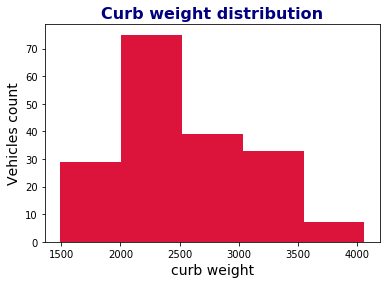

In [15]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Curb weight distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['curb-weight'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('curb weight',fontsize=14)

fig.savefig('Images/curb_weight_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.8 Drive wheels distribution

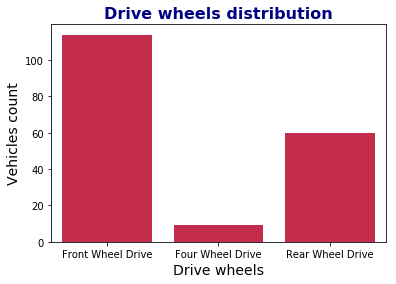

In [16]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Drive wheels distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["drive-wheels"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Drive wheels',fontsize=14)

fig.savefig('Images/drive-wheels_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.9 Number of doors distribution

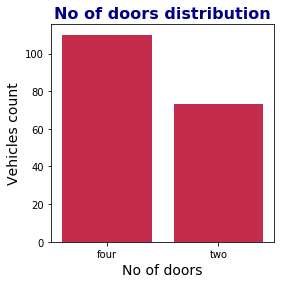

In [17]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("No of doors distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["num-of-doors"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('No of doors',fontsize=14)

fig.savefig('Images/num_of_doors_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.10 Body-style distribution

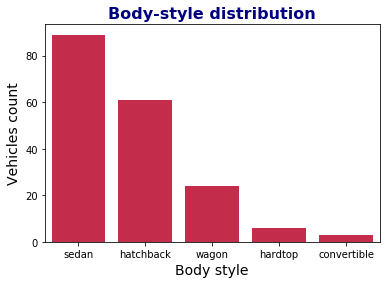

In [18]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Body-style distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")

top_5_body_style = df["body-style"].value_counts()[:5].to_frame().reset_index()
symbol_dist = sns.barplot(data=top_5_body_style, color=plot_color, x="index", y="body-style", ax=ax)

symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Body style',fontsize=14)

fig.savefig('Images/body_style_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.11 Num-of-cylinders distribution

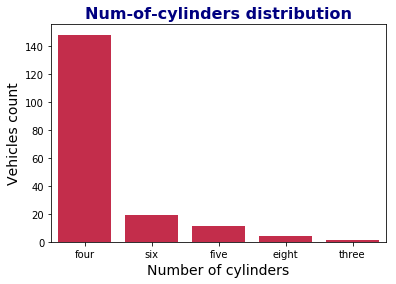

In [19]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Num-of-cylinders distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")

df_cylinders = df["num-of-cylinders"].value_counts()[:8].to_frame().reset_index()
symbol_dist = sns.barplot(data=df_cylinders, color=plot_color, x="index", y="num-of-cylinders", ax=ax)

symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Number of cylinders',fontsize=14)

fig.savefig('Images/num_of_cylinders_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.12 Let us see the distribution of some key attributes of the cars.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


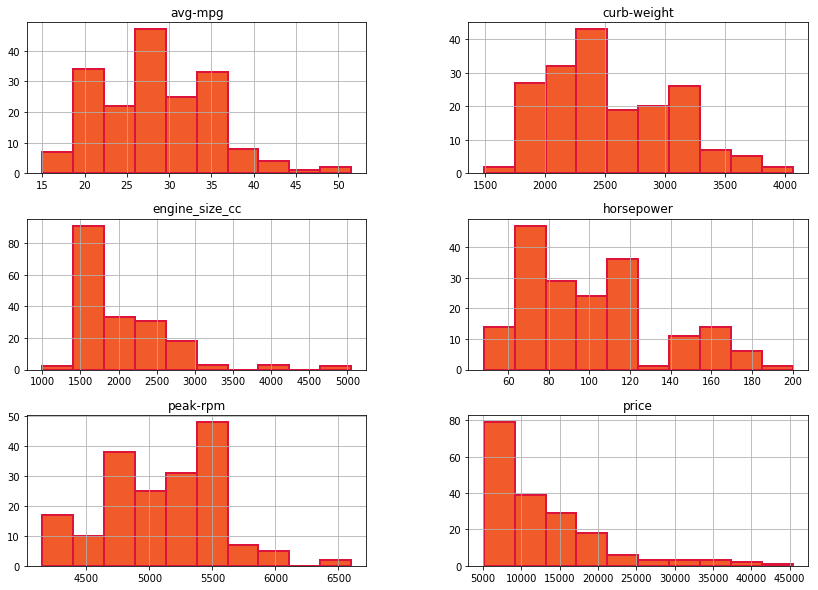

In [20]:
fig, ax = plt.subplots(figsize=(14,10), ncols=1, nrows=1)
fig.patch.set_alpha(.7)

df[['engine_size_cc','peak-rpm','curb-weight','horsepower', 'avg-mpg', 'price']].hist(color='#F15B2A', ax=ax, edgecolor=plot_color, linewidth=2)
plt.show()

fig.savefig('Images/cars_group_hist.png',dpi=fig.dpi,bbox_inches='tight')

In [21]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power_to_weight_ratio,risky_or_safe,is_risky,avg-mpg
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,24,30,13950.0,4,4,1786,0.043646,risky,1,27.0
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,18,22,17450.0,4,5,2228,0.040722,risky,1,20.0


#### 3.1.13 Vehicle count by brand and models.

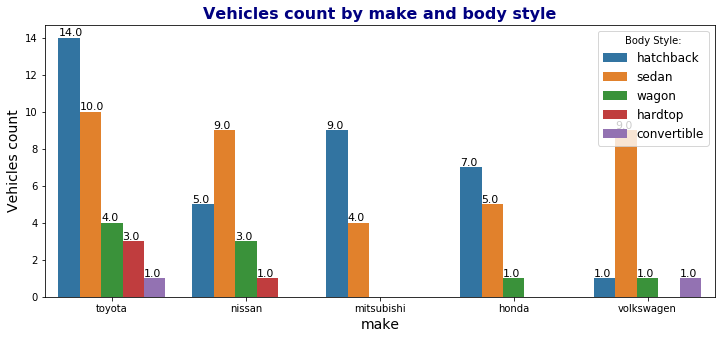

In [22]:
top_5_makers = df["make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(12,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Vehicles count by make and body style", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
symbol_dist = sns.countplot(data=df[df.make.isin(maker_cols)], order=maker_cols, x="make", hue="body-style", ax=ax)

symbol_dist.set_ylabel('Vehicles count', fontsize=14 )
symbol_dist.set_xlabel('make', fontsize=14)
symbol_dist.legend(title="Body Style:", loc="upper right", fontsize="12")

for p in symbol_dist.patches:
    symbol_dist.annotate(format(p.get_height()), (p.get_x(), p.get_height()), fontsize=11, ha='left', va='bottom')

<b>Findings:</b><br />
We have taken some key features of the automobile dataset for this analysis and below are our findings.

* <b>Toyota</b> is the make of the car which has most number of vehicles with around <b>20%</b> than the 2nd highest Nissan

* Most preferred fuel type for the customer is standard vs trubo having more than <b>80%</b> of the choice.

* Most preferred <b>body-style</b> is sedan cars around 50% out of total cars. 

* 80% cars are <b>four</b> cylinders based.

* For drive wheels, <b>front wheel drive</b> has most number of cars followed by rear wheel and four wheel. 

* Curb weight of the cars are distributed between <b>1500 and 4000</b> approximately

* Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of <b>0 and 1</b>.

* Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between <b>65 and 150</b>.

### Bi-variate Analysis

Bi-variate Analysis is the simplest form of analyzing data with two variables.

##### Global utility function to create plot.

In [46]:
# sns.set_style("whitegrid")

def DrawPairPlot(dframe, kind, diag_kind, filename):
    '''
    Draw the pair plot based on the given parameters..
    '''
    sns.pairplot(dframe, kind = kind, diag_kind = diag_kind, diag_kws=dict(color=plot_color, linewidth=1), plot_kws=dict(color=plot_color))
    plt.savefig(filename, bbox_inches='tight')
    
def DrawScatterPlot(dframe, xcol, ycol, size, plotColor, title, xlabel, ylabel, filename):
    '''
    Draw the scatter plot.
    '''
    fig, ax = plt.subplots(figsize=size, ncols=1, nrows=1) # get the figure and axes objects 

    fig.patch.set_alpha(1)
    ax.set_title(title, y = y_title_margin, fontsize=16)
    ax.patch.set_alpha(1)
    
    ax = sns.scatterplot(x=xcol, y=ycol, data=dframe, color=plotColor)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    fig.savefig(filename, dpi=fig.dpi, bbox_inches='tight')
    


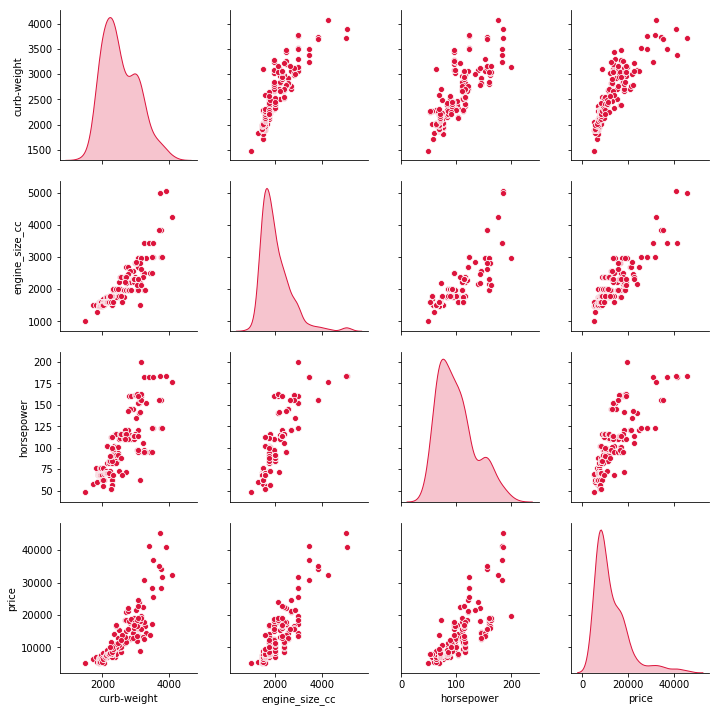

In [26]:
cols = ['curb-weight','engine_size_cc', 'horsepower','price']
filename = "Images/automobile_dataset_bodysize_pairplot.png"
DrawPairPlot(df[cols], "scatter", "kde", "body-style", filename)

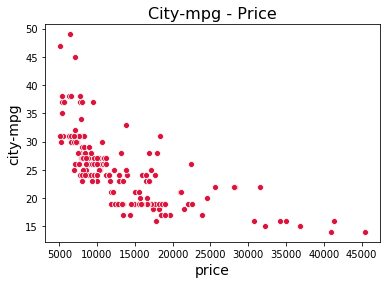

In [27]:
plot_title = "City-mpg - Price"
xlabel = "price"
yLabel = "city-mpg"
filename = "Images/automobile_dataset_citympg_price_pairplot.png"

ax = DrawScatterPlot(df, "price", "city-mpg", (6, 4), plot_color, plot_title, xlabel, yLabel, filename)

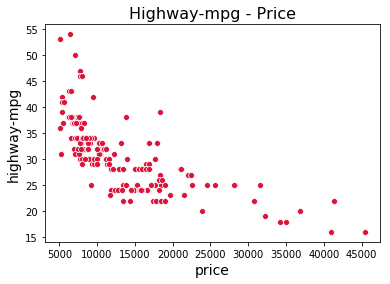

In [28]:
plot_title = "Highway-mpg - Price"
xlabel = "price"
yLabel = "highway-mpg"
filename = "Images/automobile_dataset_highwaympg_price_scatter_plot.png"

ax = DrawScatterPlot(df, "price", "highway-mpg", (6, 4), plot_color, plot_title, xlabel, yLabel, filename)

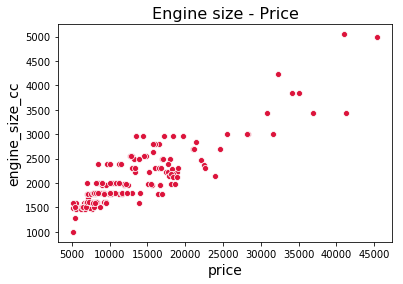

In [37]:
plot_title = "Engine size - Price"
xlabel = "price"
yLabel = "engine_size_cc"
filename = "Images/automobile_dataset_engine_price_scatter_plot_1.png"

ax = DrawScatterPlot(df, "price", "engine_size_cc", (6, 4), plot_color, plot_title, xlabel, yLabel, filename)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_doors', 'num_cylinders', 'engine_size_cc',
       'power_to_weight_ratio', 'risky_or_safe', 'is_risky', 'avg-mpg'],
      dtype='object')

<b>Findings:</b><br />
We did analysis whether car is risky or not based on various columns on automobile dataset and below are our findings.

* Less horsepower (<130) is more risky compare to higher horsepower (>130).
* Car's horsepower below <130  and curbe-weight < 2500 is 90% risky. 
* Price below 20,000 dollars and engine cc below 3,000 is 95% risky.
* Price below 20,000 dollars and horsepower below <150 is 95% risky.

#### Summary: 

* Based on the Symboling distribution, majority cars fall under 0 or 1 risk category which is less risky or less safer. 
* Majority of cars in hatchback, hardtop and convertible are in risky category.
* A two door cars is more risky compare to the four doors cars. May be two doors cars are design for drive enjoyment, due to that cars may be driven by an enthusiast.
* More the wheelbase,  more stable the car is. Declining in wheelbase is making risky the cars.

#### Data Preprocessing

#### Handling the missing values:

If we closely look at the data we will find that there are several '?' sign on the data points which indicates that there are some missing values in the dataset.
As it is difficult to deal with '?' in tha dataset we will replacing it with 'NaN' value so that we can easily deal with the null values.

In [ ]:
df[df == '?'] # Finding the locations of all '?' in the dataset.

![Alt text](Images/1.png)

In [ ]:
df = df.replace('?',np.NaN) # replacing the '?' with NaN value.

![Alt text](https://sklc-tinymce-2021.s3.amazonaws.com/comp/2021/06/Screenshot%20%28149%29_1623856061.png)

The replancement of '?' sign to null values is successfully changed.

Now we can easily determine the columns containing the null values.
df.isna().sum() # Counting the NaN values in the dataset.
Symboling             0
Normalized Losses    40
Make                  0
Fuel Type             0
Aspiration            0
No. of Doors          2
Body Style            0
Drive Wheels          0
Engine Location       0
Wheel Base            0
Length                0
Width                 0
Height                0
Curb Weight           0
Engine Type           0
No. of Cylinders      0
Engine Size           0
Fuel System           0
Bore                  4
Stroke                4
Compression Ratio     0
Horsepower            2
Peak RPM              2
City MPG              0
Highway MPG           0
Price                 4
dtype: int64
By observing the above results we have successfully counted the number missing values in different columns.

According to the results,

Normalized Losses has 40 missing values.
No. of Doors has 2 missing values.
Bore has 4 missing values.
Stroke has 4 missing values.
Horsepower and Peak RPM have 2 missing values each.
Price has 4 missing values.
We are now going to check for the number of rows having at least one missing values. 
For this process, we will first find the indexes of the datasets which contains at least one null values and then pass it on to the dataframe.

In [ ]:
d = df.isnull().any(axis = 1)
index = d.index[d.values]
index
Int64Index([  0,   1,   4,   6,   8,  13,  14,  15,  16,  26,  42,  43,  44,
             45,  47,  48,  54,  55,  56,  57,  62,  65,  70,  72,  73,  74,
             81,  82,  83, 108, 109, 112, 113, 123, 125, 126, 127, 128, 129,
            130, 180, 188, 190, 191, 192],
           dtype='int64')

These are the indexes of the dataset having at least one missing value throughout the datapoint.

Now we are going to locate all these datapoints at once and counting it.

In [ ]:
missing = df.iloc[index,:] # No of rows having at least one missing value.
missing

![Alt text](Images/2.png)

So its been foound out that there are 45 datapoints exist which has at least one missing value.

Now we are going to check if there is any row or column having all null values.
df.isnull().all(axis=0).sum() # If any columns having all missing values?
0
df.isnull().all(axis=1).sum() # If any rows having all missing values?
0
So there is no column or row exist which has all the null values.

Now lets find out the % of the missing values in all the columns.
round(df.isnull().sum().sort_values(ascending = False)/len(df) * 100,2)

Normalized Losses is the column having the most null values of about 19.61 %.
Price,Stroke and Bore are the columns containing 1.96% null values each.
Peak RPM,Horsepower and No. of Doors are the columns containing 0.98 % null values each.

#### Check Corelation

In [ ]:
#Plotting correlation plot to find correlation between all variables
#converting all the factors to numeric first
x<-data #preserving data
x[,1:ncol(x)]<-lapply(x[,1:ncol(x)],function(x){
    x=as.numeric(x)
})
cr<-cor(x)
corrplot(cr,method = "circle")

![Alt text](Images/3.png)

#### Model creation

Creating train and test dataset

In [ ]:
set.seed(19122021) #to make this analysis reproducible

#partitioning data into train(70%) and test(30%) data set
inTrain<-createDataPartition(data$price,p=0.70,list = FALSE)
trainSet<-data[inTrain,]
dim(trainSet)

## [1] 112   9

In [ ]:
testSet<-data[-inTrain,]
dim(testSet)

## [1] 47  9

Creating prediction models

Decision Trees

In [ ]:
dtMod<-train(price~.,data = trainSet, method="rpart",
           trControl=trainControl(method = "cv", number = 3, verboseIter = F))

Random Forest

In [ ]:
rfMod<-train(price~.,data = trainSet, method="rf",
           trControl=trainControl(method = "cv", number = 3, verboseIter = F))

Gradient Boosting Machine

In [ ]:
gbmMod<-train(price~.,data = trainSet, method="gbm",
             trControl=trainControl(method = "cv", number = 3, verboseIter = F),
             verbose=FALSE)

Generalized Linear Model

In [ ]:
glmMod<-train(price~.,data = trainSet, method="glm",
           trControl=trainControl(method = "cv", number = 3, verboseIter = F))

Comparing Models by the percent of variance explained

In [ ]:
compMod<-data.frame(Models=c("Decision Tree", "Random Forest", "GBM", "GLM"),
                    Variance=round(c(mean(dtMod$resample$Rsquared),mean(rfMod$resample$Rsquared),
                               mean(gbmMod$resample$Rsquared), mean(glmMod$resample$Rsquared))*100,2))
compMod

Random Forest model has explained the maximum variance of all for train data set i.e., around 90.66%. So we will move forward with Random Forest model.

In [ ]:
#plotting random forest model
plot(rfMod)

![Alt text](Images/34.png)

In [ ]:
#best mtry value for the model
rfMod$bestTune$mtry

Here no tuning required as model itself has chosen the best mtry value for feature selection.

Let’s apply our final model on test set

In [ ]:
#predicting price for testSet
pred<-predict(rfMod,testSet)

#rounding off for simplification
pred<-round(pred)

#comparing RMSE for model and testSet
RMSE<-data.frame(modelRMSE=sqrt(mean(rfMod$finalModel$mse)),
                 testSetRMSE=sqrt(sum((testSet$price-pred)^2)/length(testSet$price)))
RMSE